In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# В вашем распоряжении имеется DataFrame users с пользователями (столбец user_id) и их действиями (столбец action) на сайте компании. С помощью какого варианта кода можно найти ТОП-5 самых активных пользователей и число их действий (активность — число действий)?

In [2]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [4]:
solar_data['cum_power'].mean()

23775.573795180724

In [9]:
for i in range(len(solar_data['cum_power'])): #столбцы
    value = solar_data['cum_power'][i] 
    if value == -1:
        solar_data['cum_power'][i] = (solar_data['cum_power'][i+1] + solar_data['cum_power'][i-1])/2


round(solar_data['cum_power'].mean())

23848

In [14]:
solar_data['day_power'] = solar_data['cum_power'].diff()
solar_data.head()

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0


In [34]:
# создайте столбец day_power — ежедневная выработка солнечной энергии.
# Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.
# Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), 
# который позволяет выделять периоды (в данном случае 'М' — месяц).
# Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.
# Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

solar_data['month'] = solar_data['date'].dt.to_period('M')
solar_data.head()

,date,cum_power,day_power,month
0,2017-01-01,20111.0,0.0,2017-01
1,2017-01-02,20112.0,1.0,2017-01
2,2017-01-03,20115.0,3.0,2017-01
3,2017-01-04,20117.0,2.0,2017-01
4,2017-01-05,20119.0,2.0,2017-01


In [65]:
solar_data['month'] = solar_data['month'].astype('object')

In [68]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       664 non-null    datetime64[ns]
 1   cum_power  664 non-null    float64       
 2   day_power  664 non-null    float64       
 3   month      664 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 20.9+ KB


In [69]:
grouped = solar_data.groupby('month', as_index=False)['day_power'].mean()
grouped

,month,day_power
0,2017-01,3.129032
1,2017-02,3.714286
2,2017-03,10.774194
3,2017-04,16.300000
4,2017-05,19.000000
5,2017-06,21.500000
6,2017-07,18.129032
7,2017-08,15.064516
8,2017-09,11.533333
9,2017-10,6.419355


In [71]:
grouped['month'] = grouped['month'].astype('object')

In [72]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      22 non-null     object 
 1   day_power  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


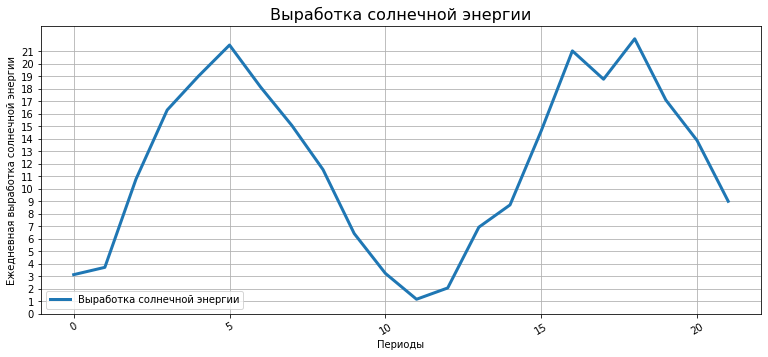

In [64]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(grouped['day_power'], label='Выработка солнечной энергии', lw=3)

axes.set_title('Выработка солнечной энергии', fontsize=16)
axes.set_xlabel('Периоды')
axes.set_ylabel('Ежедневная выработка солнечной энергии')
axes.set_yticks(range(0, 22, 1))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();